# CZI Mouse : Dimensionality Reduction and Clustering with SIMLR

In [ ]:
library(Seurat)
library(MAST)
library(DESeq2)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:Matrix':

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, cbind

### Input

In [4]:
if(FALSE) {
# X = as.matrix(read.csv("FILENAME", row.names = 1, header= TRUE , sep='\t'))
exon_matrix = as.matrix(read.csv("./mouse/exon.counts.csv", row.names = 1, header= TRUE , sep=',' ))
intron_matrix = as.matrix(read.csv("./mouse/intron.counts.csv", row.names = 1, header= TRUE , sep=',' ))

mouse_matrix = exon_matrix+intron_matrix

#mouse_counts = mouse_matrix[,c(1:20)]
mouse_counts = mouse_matrix

mouse_norm = sweep(mouse_counts,2,colSums(mouse_counts),`/`)

mouse_tpm = 1e6*mouse_norm
mouse_log = log2(mouse_tpm+1)

mouse_matrix = mouse_log

mouse_matrix <- mouse_matrix[,colSums(mouse_matrix != 0) != 0]

saveRDS(mouse_matrix , file = "mouse_matrix.Rdata")
#readRDS("results/edv_simlr_clustering_v2018-001-224952.Rdata")
}

mouse_matrix = readRDS(file = "mouse_matrix.Rdata")

### Seurat pipeline

In [7]:
seurat_object <- CreateSeuratObject(raw.data = mouse_matrix,  project = "CZI")

### Dimensionality reduction and clustering


In [14]:
n_clust = 50 
set.seed(11111)
cat("Performing analysis for the Mouse dataset","\n")
#res_large_scale = SIMLR_Large_Scale(X=mouse_matrix,c=n_clust,k=30,kk=200)
res_large_scale = SIMLR_Large_Scale(X=mouse_matrix,c=n_clust,k=30,kk=200)







path <- "results/edv_simlr_clustering_v" 
time <- format(Sys.time(), format = "%Y-%j-%H%M%S") 


saveRDS(res_large_scale , file = paste0(path, time , ".RData"))

pdf(file=paste0(path, time , ".pdf")) 
# make the scatterd plots
plot(res_large_scale$ydata,col=c(colors(n_clust))[res_large_scale$y$cluster],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for Zelsel")
dev.off() 

#readRDS("results/edv_simlr_clustering_v2018-001-224952.Rdata")

Performing analysis for the Mouse dataset 
Performing fast PCA.
Performing k-nearest neighbour search.
Computing the multiple Kernels.
Performing the iterative procedure  10  times.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Iteration:  6 
Iteration:  7 
Iteration:  8 
Iteration:  9 
Iteration:  10 
Performing Kmeans.
Performing t-SNE.
The main loop will be now performed with a maximum of 300 iterations.
Performing iteration 1.
Performing iteration 2.
Performing iteration 3.
Performing iteration 4.
Performing iteration 5.
Performing iteration 6.
Performing iteration 7.
Performing iteration 8.
Performing iteration 9.
Performing iteration 10.
Performing iteration 11.
Performing iteration 12.
Performing iteration 13.
Performing iteration 14.
Performing iteration 15.
Performing iteration 16.
Performing iteration 17.
Performing iteration 18.
Performing iteration 19.
Performing iteration 20.
Performing iteration 21.
Performing iteration 22.
Performing iteratio

png 
  2

### Looking for 140 clusters 
Since that is the number in the cl.csv example file

In [138]:
results=readRDS("results/edv_simlr_clustering_n50_v2018-006-033053.RData")

In [141]:
results$y = kmeans(results$F,140,nstart=200)


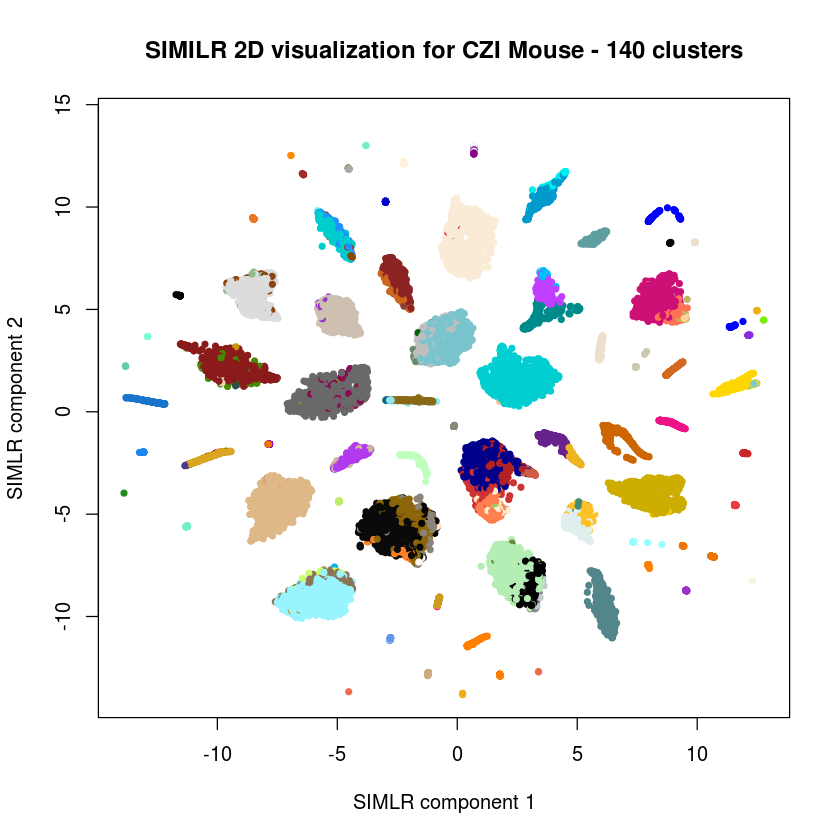

In [144]:
plot(results$ydata,col=c(colors(140))[results$y$cluster],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for CZI Mouse - 140 clusters")

### Louvain Clustering

In [103]:
names(results)

class(results$y$cluster)

[1] "y"              "S0"             "F"              "ydata"         
[5] "alphaK"         "val"            "ind"            "execution.time"

[1] "integer"

In [118]:
library(Seurat)

In [119]:
mouse_matrix = readRDS(file = "mouse_matrix.Rdata")

In [120]:
czi_mouse_simlr <- CreateSeuratObject(raw.data = mouse_matrix,  project = "CZI")



In [129]:
simlr_embeddings = results$F
str(simlr_embeddings)
row.names(simlr_embeddings) = colnames(mouse_matrix)
colnames(x = simlr_embeddings) <- paste0("SIMLR", 1:dim(simlr_embeddings)[2])


 num [1:21749, 1:66] -1.29e-11 9.91e-08 1.18e-09 9.89e-08 1.45e-09 ...


In [130]:
str(colnames(mouse_matrix))
dim(simlr_embeddings)

 chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" ...


[1] 21749    66

In [131]:
str(mouse_matrix)
str(simlr_embeddings)

 num [1:45768, 1:21749] 0 0 5.14 6.62 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:45768] "0610005C13Rik" "0610006L08Rik" "0610007P14Rik" "0610009B22Rik" ...
  ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
 num [1:21749, 1:66] -1.29e-11 9.91e-08 1.18e-09 9.89e-08 1.45e-09 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..$ : chr [1:66] "SIMLR1" "SIMLR2" "SIMLR3" "SIMLR4" ...


In [132]:

czi_mouse_simlr <- SetDimReduction(object = czi_mouse_simlr, reduction.type = "simlr", slot = "cell.embeddings", 
    new.data = simlr_embeddings)
czi_mouse_simlr <- SetDimReduction(object = czi_mouse_simlr, reduction.type = "simlr", slot = "key", 
    new.data = "SIMLR")

str(czi_mouse_simlr)

Formal class 'seurat' [package "Seurat"] with 20 slots
  ..@ raw.data    : num [1:45768, 1:21749] 0 0 5.14 6.62 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:45768] "0610005C13Rik" "0610006L08Rik" "0610007P14Rik" "0610009B22Rik" ...
  .. .. ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ data        : num [1:45768, 1:21749] 0 0 5.14 6.62 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:45768] "0610005C13Rik" "0610006L08Rik" "0610007P14Rik" "0610009B22Rik" ...
  .. .. ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ scale.data  : NULL
  ..@ var.genes   : logi(0) 
  ..@ is.expr     : num 0
  ..@ ident       : Factor w/ 66 levels "0","1","2","3",..: 12 28 4 28 4 4 4 1 2 4 ...
  .. ..- attr(*, "names")= chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ meta.data   :'d

In [135]:
czi_mouse_simlr <- FindClusters(czi_mouse_simlr, reduction.type = "simlr", dims.use = 1:50, save.SNN = T , force.recalc =TRUE)


[1] "Constructing SNN"
  |======================================================================| 100%


In [136]:
str(czi_mouse_simlr)

Formal class 'seurat' [package "Seurat"] with 20 slots
  ..@ raw.data    : num [1:45768, 1:21749] 0 0 5.14 6.62 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:45768] "0610005C13Rik" "0610006L08Rik" "0610007P14Rik" "0610009B22Rik" ...
  .. .. ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ data        : num [1:45768, 1:21749] 0 0 5.14 6.62 0 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:45768] "0610005C13Rik" "0610006L08Rik" "0610007P14Rik" "0610009B22Rik" ...
  .. .. ..$ : chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ scale.data  : NULL
  ..@ var.genes   : logi(0) 
  ..@ is.expr     : num 0
  ..@ ident       : Factor w/ 73 levels "0","1","2","3",..: 51 11 4 11 4 4 4 14 6 4 ...
  .. ..- attr(*, "names")= chr [1:21749] "LS.14690_S02_E1.50" "LS.14690_S03_E1.50" "LS.14690_S05_E1.50" "LS.14690_S06_E1.50" ...
  ..@ meta.data   :'

In [104]:
(czi_mouse_simlr@ident)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
plot(results$ydata,col=c(colors(73))[czi_mouse_simlr@ident],xlab="SIMLR component 1", ylab="SIMLR component 2",pch=20,main="SIMILR 2D visualization for CZI Mouse - Graph Clustering")